In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [25]:
# Read in the file, “house price dataset.csv”, and create a dataframe.
df = pd.read_csv('house price dataset.csv',header=0)
sns.set(style='whitegrid',context='notebook')

In [26]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [27]:
#Convert Price to data type float
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [28]:
#Calculate the median price 
price_median = df.Price.median()

In [29]:
#Fill the missing values with the median price
df.Price.fillna(price_median)

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [30]:
#Show that there a no missing values and all values are of type float
missing = df.isnull().sum()
print(missing)
df.dtypes

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           1
Address                         0
dtype: int64


Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [31]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [32]:
# Use the following columns as features: Ave. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, and 
# Area Population. Price is the label or target for the model.
# Instantiate a LinearRegression model and set fit_intercept to True.
model = LinearRegression(fit_intercept = True)

In [33]:
# Fit the first 2999 (X[:3000] samples from the data set.
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']]
y = df.Price
model.fit(X[:3000], y[:3000])

LinearRegression()

In [34]:
# What are model coefficients and intercept?
model.coef_

array([2.16809437e+01, 1.65528984e+05, 1.19119689e+05, 1.51590883e+01])

In [35]:
model.intercept_

-2624452.517635082

In [36]:
# Using the model, predict the house price for the remaining samples (X[3000:]).
y_predict = model.predict(X[3000:])
y_predict

array([1448494.56488363, 1302347.71958561, 1355674.71499298, ...,
       1026764.47853341, 1261488.26254644, 1301796.95386376])

In [37]:
#Test the model with known values
model.predict([[79545.45857, 5.682861, 7.009188, 23086.80050]])

array([1225753.43635367])

In [41]:
# #Evaluate the model with r2_score --> 91% 
# from sklearn.metrics import r2_score
# r2_score(y[3000:], y_predict)

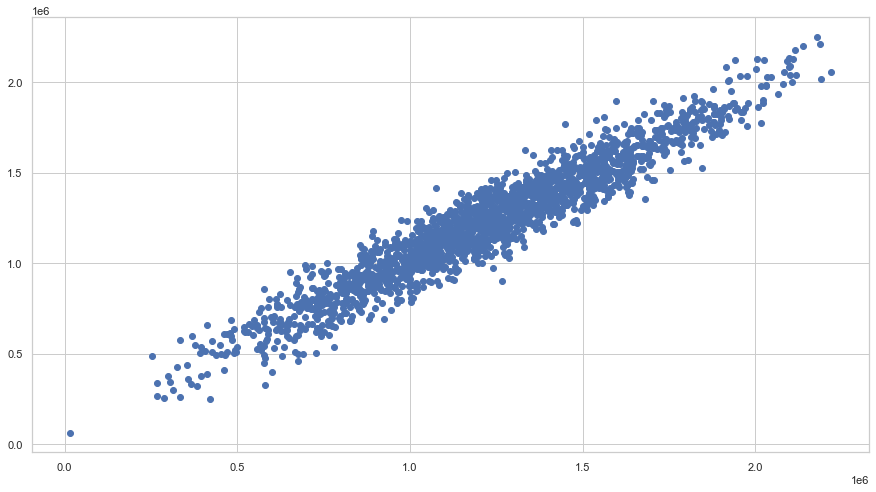

In [54]:
# Create a scatter plot of the predicted house price and the actual house price using the first 2999 samples.
plt.figure(figsize=(15,8))
plt.scatter(y[3000:],y_predict)

In [43]:
# What would you conclude from viewing the plot?

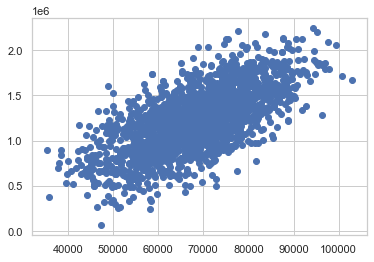

In [50]:
# Create a scatter plot of the ‘Ave Area Income’ and the predicted Price.
X_income = X['Avg. Area Income']
plt.scatter(X_income[3000:],y_predict)


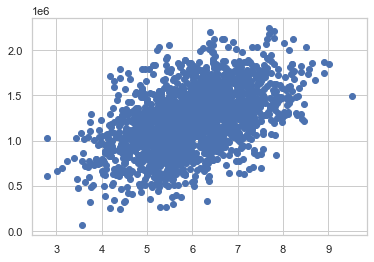

In [46]:
# Create a scatter plot of the ‘Ave Area House Age’ and the predicted Price.
X_age = X['Avg. Area House Age']
plt.scatter(X_age[3000:],y_predict)

In [47]:
# Compute the coefficient of determination of the prediction. Hint: use model.score with the first 2999 samples.
model.score(X[:3000],y[:3000])

0.918258331635776